# Importing Libraries

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the csv data

In [322]:
df=pd.read_csv('/content/Obesity.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [323]:
#rename NObeyesdad to target
df.rename(columns={'NObeyesdad':'Target'},inplace=True)

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [325]:
df.shape

(2111, 17)

In [326]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [327]:
df.isnull().sum()

,0
Gender,9
Age,0
Height,10
Weight,0
family_history_with_overweight,6
FAVC,0
FCVC,0
NCP,0
CAEC,9
SMOKE,0


# EDA

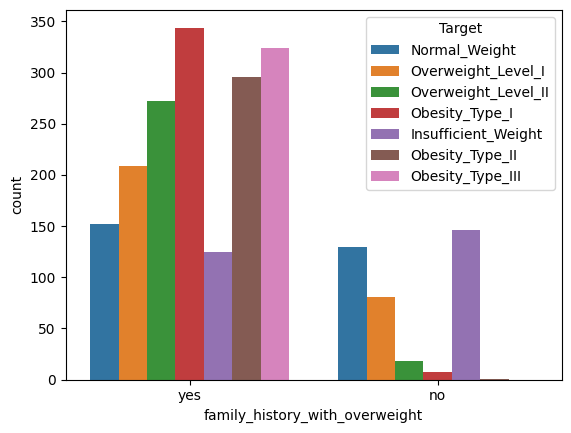

In [328]:
#bargrapg between familyhisorty with target
sns.countplot(x='family_history_with_overweight',hue='Target',data=df)
plt.show()

If the family have obesity then there is a change to have obesity.

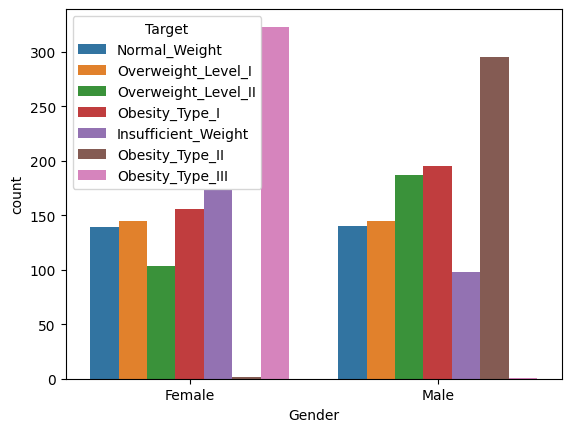

In [329]:
#bar graph between Gender with target
sns.countplot(x='Gender',hue='Target',data=df)
plt.show()

Female has a change of getting Obesity_type III compaired to male.

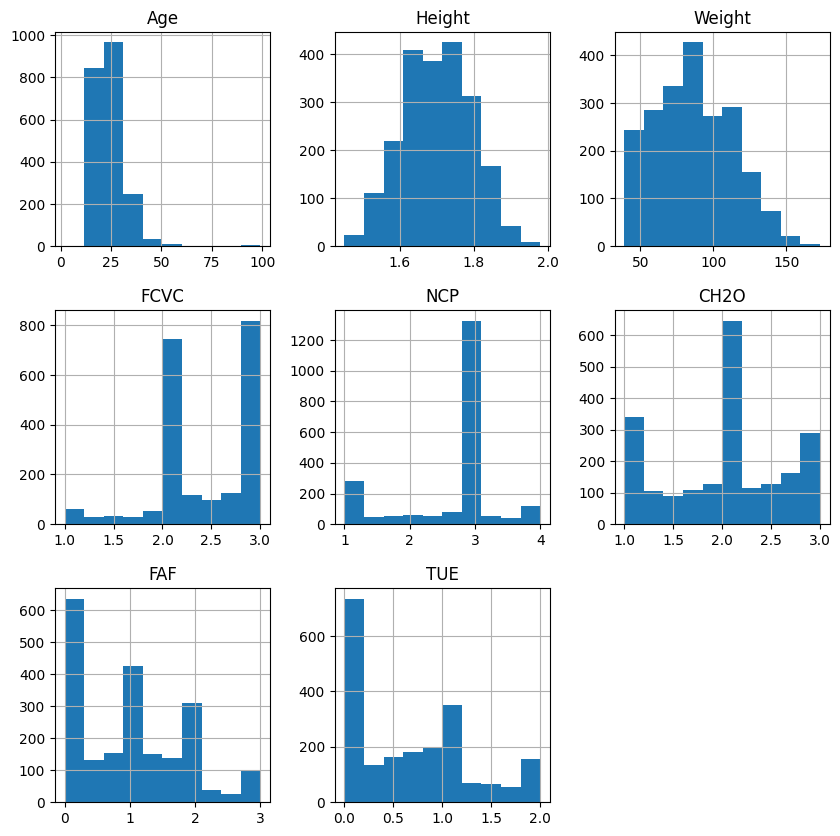

In [330]:
#ploting histogram
df.hist(figsize=(10,10))
plt.show()

In [331]:
#filling null values
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Height']=df['Height'].fillna(df['Height'].median())
df['family_history_with_overweight']=df['family_history_with_overweight'].fillna(df['family_history_with_overweight'].mode()[0])
df['CAEC']=df['CAEC'].fillna(df['CAEC'].mode()[0])
df['SCC']=df['SCC'].fillna(df['SCC'].mode()[0])
df['MTRANS']=df['MTRANS'].fillna(df['MTRANS'].mode()[0])

In [332]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


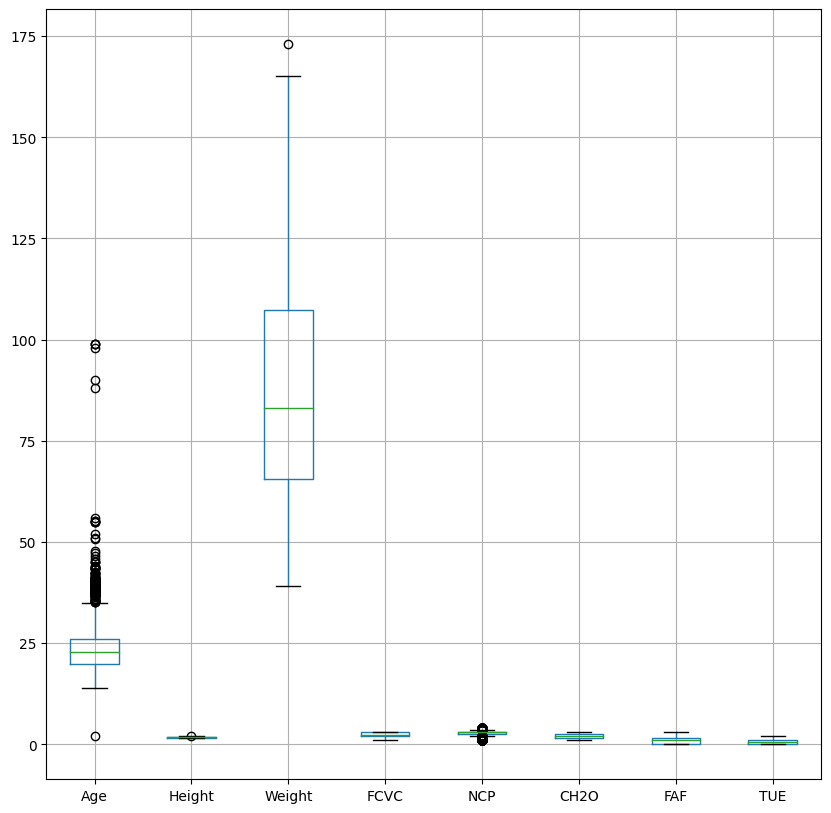

In [333]:
#Box Plot
df.boxplot(figsize=(10,10))
plt.show()

There are outliers in columns age,height,weight,NCP.

In [334]:
#handling outliers
col=['Age','Height','Weight','NCP']
for i in col:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  upper=q3+1.5*iqr
  lower=q1-1.5*iqr
  df[i]=np.where(df[i]>upper,upper,np.where(df[i]<lower,lower,df[i]))


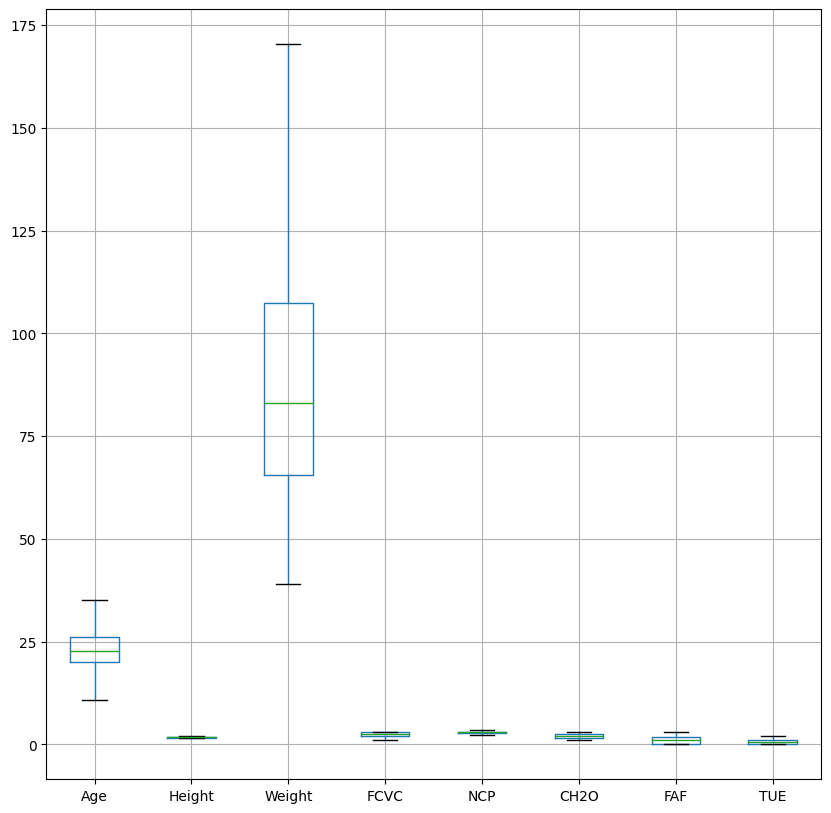

In [335]:
#boxplot to check if outliers are handled correctly
df.boxplot(figsize=(10,10))
plt.show()


Removed the outliers

In [336]:
df.Target.value_counts()

,count
Target,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [337]:
#label encode target
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Target']=le.fit_transform(df['Target'])
df.Target.value_counts()

,count
Target,
2,351
4,324
3,297
5,290
6,290
1,287
0,272


In [338]:
#correlation matrix of numerical columns
numerical=df.select_dtypes(include=['int64','float64'])
numerical.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Target
Age,1.000000,-0.007280,0.245335,0.031388,-0.099324,-0.039372,-0.159242,-0.295294,0.257302
Height,-0.007280,1.000000,0.459861,-0.038135,0.209749,0.213276,0.296591,0.051246,0.035766
Weight,0.245335,0.459861,1.000000,0.216106,0.054791,0.200607,-0.051500,-0.071599,0.387679
FCVC,0.031388,-0.038135,0.216106,1.000000,0.040449,0.068461,0.019939,-0.101135,0.018522
NCP,-0.099324,0.209749,0.054791,0.040449,1.000000,0.058640,0.129371,0.037937,-0.131480
CH2O,-0.039372,0.213276,0.200607,0.068461,0.058640,1.000000,0.167236,0.011965,0.108868
FAF,-0.159242,0.296591,-0.051500,0.019939,0.129371,0.167236,1.000000,0.058562,-0.129564
TUE,-0.295294,0.051246,-0.071599,-0.101135,0.037937,0.011965,0.058562,1.000000,-0.069448
Target,0.257302,0.035766,0.387679,0.018522,-0.131480,0.108868,-0.129564,-0.069448,1.000000


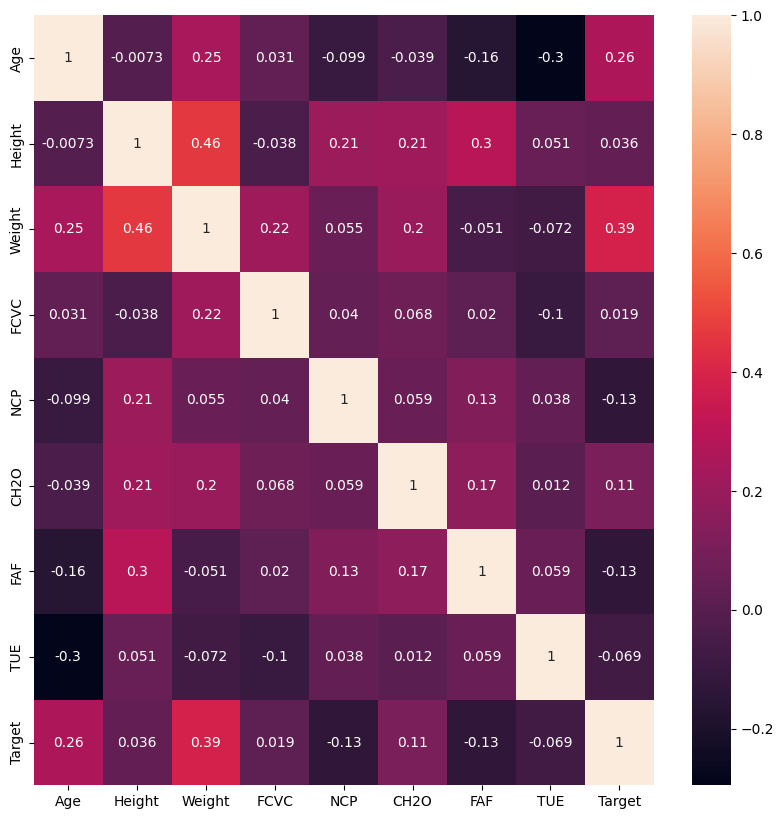

In [339]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(numerical.corr(),annot=True)
plt.show()

In [340]:
Categorical=df.select_dtypes(include=['object'])
Categorical

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,Male,no,no,Sometimes,no,no,Frequently,Walking
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation


In [341]:
#manual encoding
df['family_history_with_overweight']=df['family_history_with_overweight'].map({'yes':1,'no':0})
df['CAEC']=df['CAEC'].map({'Sometimes':0,'Frequently':1,'Always':2,'no':3,'Sometimes':4})
df['CALC']=df['CALC'].map({'Sometimes':0,'Frequently':1,'Always':2,'no':3,'Sometimes':4})
df['SCC']=df['SCC'].map({'yes':1,'no':0})
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['MTRANS']=df['MTRANS'].map({'Public_Transportation':0,'Walking':1,'Automobile':2,'Motorbike':3,'Bike':4})
df['SMOKE']=df['SMOKE'].map({'yes':1,'no':0})
df['FAVC']=df['FAVC'].map({'yes':1,'no':0})


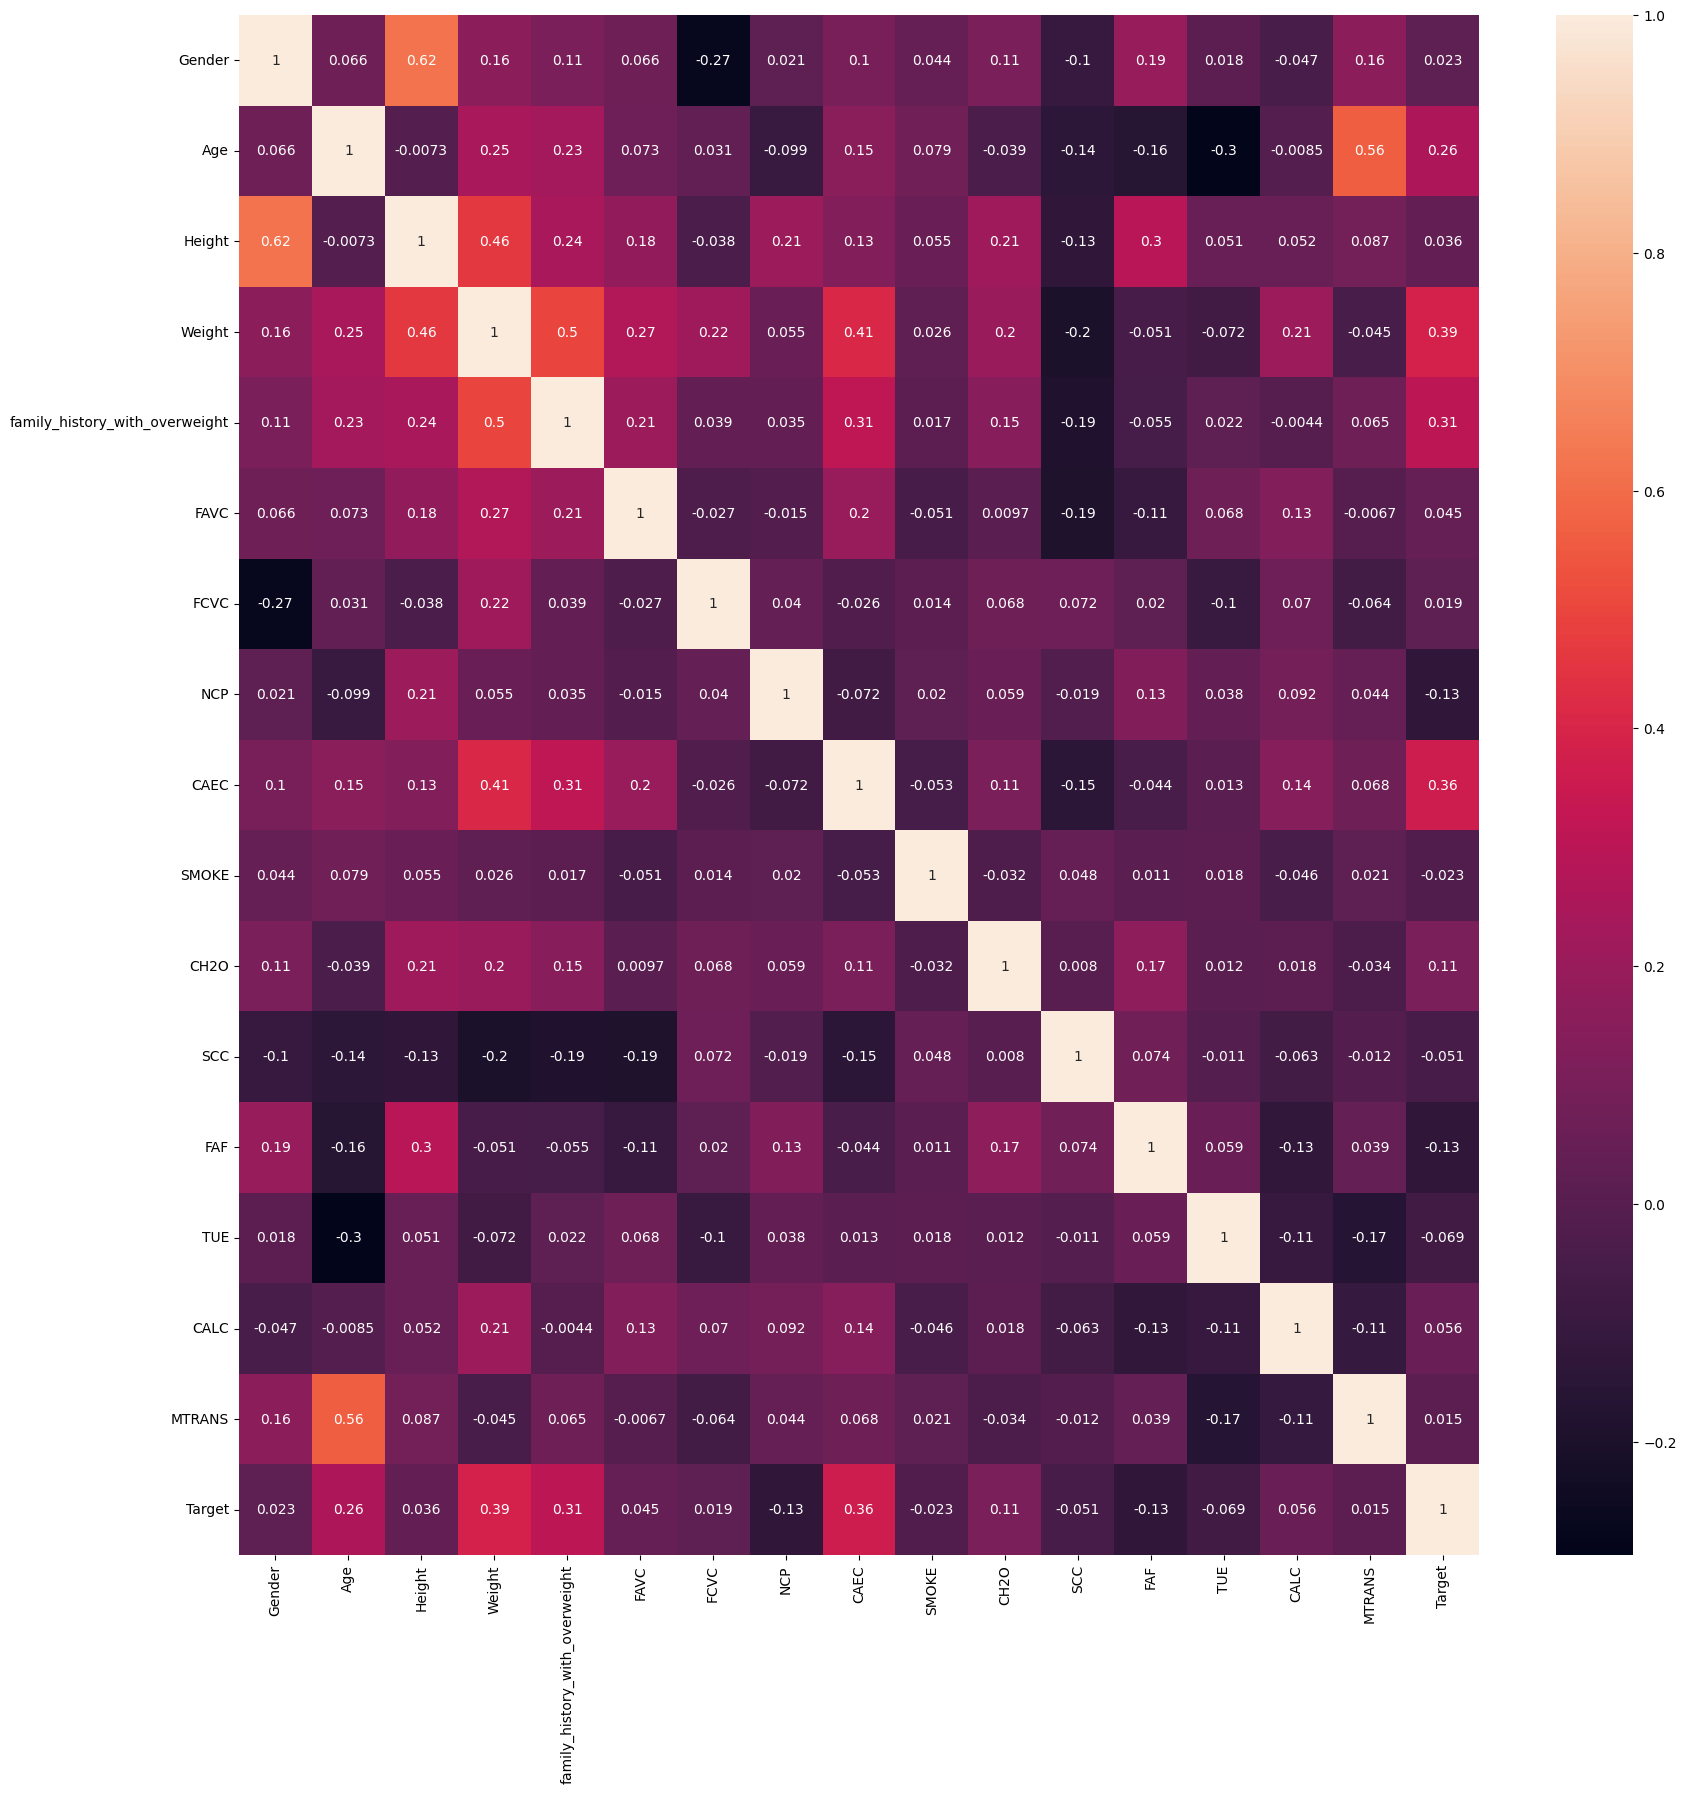

In [342]:
#heatmap of df
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [343]:
#droping columns with less correlation to target
df.drop(['Gender','Height','CALC','MTRANS','FAVC','FCVC','SMOKE','SCC','TUE'],axis=1,inplace=True)

In [344]:
df.shape

(2111, 8)

Spliting df into x any y

In [345]:
x=df.drop('Target',axis=1)
y=df['Target']

In [346]:
x.head(5)

,Age,Weight,family_history_with_overweight,NCP,CAEC,CH2O,FAF
0,21.0,64.0,1,3.000000,4,2.0,0.0
1,21.0,56.0,1,3.000000,4,3.0,3.0
2,23.0,77.0,1,3.000000,4,2.0,2.0
3,27.0,87.0,0,3.000000,4,2.0,2.0
4,22.0,89.8,0,2.146845,4,2.0,0.0


In [347]:
x.shape

(2111, 7)

In [348]:
#standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [349]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=62,stratify=y)

#Descision Tree Classifier

In [350]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

#cross validation
scores=cross_val_score(dt,x_train,y_train,cv=5)
print(scores)
print("Cross_validation Accuracy",scores.mean())


0.8321513002364066
              precision    recall  f1-score   support

           0       0.85      0.93      0.88        54
           1       0.76      0.60      0.67        58
           2       0.82      0.84      0.83        70
           3       0.89      0.95      0.92        60
           4       0.96      0.98      0.97        65
           5       0.75      0.79      0.77        58
           6       0.76      0.71      0.73        58

    accuracy                           0.83       423
   macro avg       0.83      0.83      0.83       423
weighted avg       0.83      0.83      0.83       423

[0.84023669 0.78402367 0.81952663 0.8041543  0.86350148]
Cross_validation Accuracy 0.8222885537197339


#svm

In [351]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

#cross validation
scores=cross_val_score(svm,x_train,y_train,cv=5)
print(scores)
print("Cross_validation Accuracy",scores.mean())

0.7470449172576832
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        54
           1       0.73      0.64      0.68        58
           2       0.71      0.64      0.68        70
           3       0.94      0.97      0.95        60
           4       0.93      0.98      0.96        65
           5       0.65      0.41      0.51        58
           6       0.46      0.67      0.55        58

    accuracy                           0.75       423
   macro avg       0.75      0.75      0.74       423
weighted avg       0.76      0.75      0.74       423

[0.74852071 0.71597633 0.74556213 0.75667656 0.76261128]
Cross_validation Accuracy 0.7458694010851052


# Random Forest Classifier

In [352]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
rf=RandomForestClassifier(random_state=62,class_weight='balanced')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

#cross validation
scores=cross_val_score(rf,x_train,y_train,cv=5)
print(scores)
print("Cross_validation Accuracy",scores.mean())

0.8912529550827423
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.79      0.79      0.79        58
           2       0.90      0.86      0.88        70
           3       0.95      0.98      0.97        60
           4       0.98      0.98      0.98        65
           5       0.84      0.88      0.86        58
           6       0.82      0.81      0.82        58

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.89      0.89      0.89       423

[0.85502959 0.83727811 0.90236686 0.87537092 0.87833828]
Cross_validation Accuracy 0.8696767510052148


# hyperparameter tuning using gridsearchCV

In [353]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best Parameters found: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

hm = grid_search.best_estimator_
y_pred = hm.predict(x_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.p

Best Parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score:  0.8868646076589467

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.80      0.78      0.79        58
           2       0.91      0.84      0.87        70
           3       0.97      0.98      0.98        60
           4       0.98      1.00      0.99        65
           5       0.85      0.91      0.88        58
           6       0.82      0.84      0.83        58

    accuracy                           0.90       423
   macro avg       0.90      0.90      0.90       423
weighted avg       0.90      0.90      0.90       423



since gridsearchCV has given the highest crossvaliadtion accuracy of 88%.

hm model is taken for predicting new values

# Predict for new values

Prediction done using RandomForestClassifier

In [355]:

new_date={
    'Age':23,
    'Weight':77,
    'family_history_with_overweight':1,
    'NCP':3,
    'CAEC':4,
    'CH2O':2,
    'FAF':2
}
new_df=pd.DataFrame(new_date,index=[0])
print(new_df)
new_df=sc.transform(new_df)
new_pred=hm.predict(new_df)
if new_pred==0:
  print('Insufficient_Weight')
elif new_pred==1:
  print('Normal_Weight')
elif new_pred==5:
  print('Overweight_Level_I')
elif new_pred==6:
  print('Overweight_Level_II')
elif new_pred==2:
  print('Obesity_Type_I')
elif new_pred==3:
  print('Obesity_Type_II')
elif new_pred==4:
  print('Obesity_Type_III')
else:
  print('Error')




   Age  Weight  family_history_with_overweight  NCP  CAEC  CH2O  FAF
0   23      77                               1    3     4     2    2
Normal_Weight
